# テーマ2

# NG_特定のカラムだけにする

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルを読み込む
df = pd.read_csv('train.csv')

# ヘッダー行から列名を動的に取得する
column_names_to_extract = ['1', '2', '3', '4', '5', '6', '15', '16', '17', '18', '23', '24']  # 必要な列名をリストで指定

# 動的に取得した列名を使ってデータを抽出する
extracted_columns = df[column_names_to_extract]

# 抽出したデータを新しいCSVファイルとして保存する
extracted_columns.to_csv('extracted_data.csv', index=False)

# ファイルが保存されたことを確認するためにメッセージを表示
print("Extracted data has been saved to extracted_data.csv")

Saving train.csv to train (5).csv


KeyError: "None of [Index(['1', '2', '3', '4', '5', '6', '15', '16', '17', '18', '23', '24'], dtype='object')] are in the [columns]"

# [不要]データ補完(湿度の補完) 降水量*50で100以内

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_train.csv')
# print(df)

# Handle rows where the 5th column is empty
df['Humidity3pm'] = df.apply(
    # lambda row: (int(row.iloc[3]) * 50) if pd.isnull(row.iloc[4]) else row.iloc[4],
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)
# Filter rows where the 5th column was filled (to avoid NaN values)
df = df[~pd.isnull(df['Humidity3pm'])]
# print(df)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_extracted_train.csv', index=False)

Saving extracted_train.csv to extracted_train.csv


# データ補完(湿度の補完) 降水量*50で100以内にしRainTodayを0,1変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_train.csv')

# 変換ルールを定義
conversion_map = {
    'No': 0,
    'Yes': 1
}

# Humidity3pmの空セルにRainfallの50倍の数値を入れる(最大値100)
df['Humidity3pm'] = df.apply(
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)

df = df[~pd.isnull(df['Humidity3pm'])]

# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday', 'RainTomorrow']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_extracted_train.csv', index=False)

Saving extracted_train.csv to extracted_train.csv


<ipython-input-1-c681335d8c52>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


# test.csvを同じように変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# Read the CSV file
df = pd.read_csv('extracted_test.csv')

# 変換ルールを定義
conversion_map = {
    'No': 0,
    'Yes': 1
}

# Humidity3pmの空セルにRainfallの50倍の数値を入れる(最大値100)
df['Humidity3pm'] = df.apply(
    lambda row: min(int(row.iloc[3]) * 50, 100) if pd.isnull(row.iloc[4]) else row.iloc[4],
    axis=1
)

df = df[~pd.isnull(df['Humidity3pm'])]

# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# Select the columns you want to save
columns_to_save = ['id', 'Date', 'Location', 'Rainfall', 'Humidity3pm', 'RainToday']  # Replace with actual column names

# Save the processed data to a new CSV file
df[columns_to_save].to_csv('hokann_test.csv', index=False)

Saving extracted_test.csv to extracted_test (1).csv


<ipython-input-7-e933fd24a438>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


# 補完済みtrain.csvの訓練データ分割(8:2)(簡易)

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('light_hokann_extracted_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをTSVファイルとして保存:
train_df.to_csv('light_hokann_extracted_train8.csv', index=False)
val_df.to_csv('light_hokann_extracted_train2.csv', index=False)

# データの保存
files.download('light_hokann_extracted_train8.csv')
files.download('light_hokann_extracted_train2.csv')

Saving light_hokann_extracted_train.csv to light_hokann_extracted_train (4).csv
Training set size: 39
Validation set size: 10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補完済みtrain.csvの訓練データ分割

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('hokann_extracted_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをTSVファイルとして保存:
train_df.to_csv('hokann_extracted_train8.csv', index=False)
val_df.to_csv('hokann_extracted_train2.csv', index=False)

# データの保存
files.download('hokann_extracted_train8.csv')
files.download('hokann_extracted_train2.csv')

Saving hokann_extracted_train.csv to hokann_extracted_train.csv
Training set size: 67487
Validation set size: 16872


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# [NG]テーマ2 決定木モデル(検証)

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'hokann_extracted_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_train = train_data.iloc[1:, 6]    # 6カラム目が目的変数

# 各カラムのデータ型を出力
#print("=== Initial Data Types (X_train) ===")
#print(X_train)
#print("------")
#print(X_train.dtypes)

#print("=== Initial Data Types (y_train) ===")
#print(y_train)
#print("------")
#print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'hokann_extracted_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の3,4,5,カラム目を説明変数として取得（ヘッダを含まない）
test_data = test_data.iloc[1:, 3:6]  # 2行目以降を取得

# 各カラムのデータ型を出力
# print("=== Initial Data Types (train2) ===")
# print(test_data)
# print("------")
# print(test_data.dtypes)

# 新しいデータで目的変数を予測する
predictions = model.predict(test_data)

# 予測結果を出力する
# output = pd.DataFrame(predictions, columns=['Predicted'])
# output.to_csv('theme2_tree_model_predictions.csv', index=False)
# データの保存
# files.download('theme2_tree_model_predictions.csv')


Saving hokann_extracted_train2.csv to hokann_extracted_train2 (3).csv
Saving hokann_extracted_train8.csv to hokann_extracted_train8 (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

=== Initial Data Types (train2) ===
       Rainfall  Humidity3pm  RainToday
1           2.4         45.0          1
2           0.0         60.0          0
3           0.0         34.0          0
4           0.0         39.0          0
5           0.0         49.0          0
...         ...          ...        ...
16867       0.0         54.0          0
16868       0.0         69.0          0
16869       0.0         33.0          0
16870       0.0         55.0          0
16871       0.0          0.0          0

[16871 rows x 3 columns]
------
Rainfall       float64
Humidity3pm    float64
RainToday        int64
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# テーマ2決定木モデル検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'hokann_extracted_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_train = train_data.iloc[1:, 6]    # 6カラム目が目的変数

# 各カラムのデータ型を出力
#print("=== Initial Data Types (X_train) ===")
#print(X_train)
#print("------")
#print(X_train.dtypes)

#print("=== Initial Data Types (y_train) ===")
#print(y_train)
#print("------")
#print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
#model_filename = 'int_theme2_tree_model.joblib'
#joblib.dump(model, model_filename)
# データの保存
#files.download('int_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'hokann_extracted_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の3,4,5,カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, 3:6]  # 3,4,5カラム目が説明変数
y_val = test_data.iloc[1:, 6]    # 6カラム目が目的変数


# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving hokann_extracted_train2.csv to hokann_extracted_train2 (4).csv
Saving hokann_extracted_train8.csv to hokann_extracted_train8 (4).csv
Accuracy: 82.08%

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.95      0.89     13112
         Yes       0.68      0.37      0.48      3759

    accuracy                           0.82     16871
   macro avg       0.76      0.66      0.68     16871
weighted avg       0.80      0.82      0.80     16871


Confusion Matrix:
[[12471   641]
 [ 2383  1376]]


# 実践

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'int_theme2_tree_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'hokann_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得（4,5,6カラム目を使用）
X_test = test_data.iloc[0:, 3:6]  # 2行目以降の4-6カラム目を使用

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'theme2_tree_model_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('theme2_tree_model_result.csv')

Saving hokann_extracted_train.csv to hokann_extracted_train (1).csv
Saving hokann_test.csv to hokann_test (1).csv
Predictions saved to theme2_tree_model_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ー決定木モデルからランダムフォレストにしてみるー

# hokanから精度予測

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('hokann_extracted_train.csv')

# データを確認
print("Data Sample:")
print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8514
X = train_data[['Rainfall', 'Humidity3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データを確認
print("Data Sample:")
print(train_data.head())

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# テストデータと予測結果のサイズを確認
print(f"Size of y_test: {y_test.shape}")
print(f"Size of y_pred: {y_pred.shape}")

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving hokann_extracted_train.csv to hokann_extracted_train (2).csv
Data Sample:
            id       Date Location  Rainfall  Humidity3pm  RainToday  \
0  train_00000  2008/12/1   Albury       0.6         22.0          0   
1  train_00001  2008/12/2   Albury       0.0         25.0          0   
2  train_00002  2008/12/5   Albury       1.0         33.0          0   
3  train_00003  2008/12/6   Albury       0.2         23.0          0   
4  train_00004  2008/12/7   Albury       0.0         19.0          0   

  RainTomorrow  
0           No  
1           No  
2           No  
3           No  
4           No  
Data Sample:
            id       Date Location  Rainfall  Humidity3pm  RainToday  \
0  train_00000  2008/12/1   Albury       0.6         22.0          0   
1  train_00001  2008/12/2   Albury       0.0         25.0          0   
2  train_00002  2008/12/5   Albury       1.0         33.0          0   
3  train_00003  2008/12/6   Albury       0.2         23.0          0   
4  train_00

# 別パターン1 精度向上せず

# K-fold

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from google.colab import files

# ローカルからCSVファイルをアップロード
uploaded = files.upload()

# CSVファイルを読み込む
data = pd.read_csv('hokann_extracted_train.csv')

# 説明変数と目的変数に分割
# ここでは、目的変数が最終列で、説明変数がそれ以外と仮定
# 必要に応じて適切にカラム名またはインデックスで調整してください
X = data.iloc[1:, 3:6]  # 説明変数
y = data.iloc[1:, 6]   # 目的変数

# 決定木モデルのインスタンス作成
clf = DecisionTreeClassifier(random_state=42)

# K-foldクロスバリデーションの設定
k = 5  # 例えば5-foldに設定
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# クロスバリデーションを実行し、各foldの精度を出力
scores = cross_val_score(clf, X, y, cv=kf)

# 結果の表示
print(f"{k}-fold クロスバリデーションの各スコア: {scores}")
print(f"平均精度: {scores.mean():.2f}")

Saving hokann_extracted_train.csv to hokann_extracted_train (3).csv
5-fold クロスバリデーションの各スコア: [0.81602655 0.81893077 0.81584874 0.8176753  0.81814949]
平均精度: 0.82


# 別パターン2 ランダムフォレスト

# ランダムフォレスト

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# CSVファイルを読み込む
data = pd.read_csv('hokann_extracted_train.csv')

# 説明変数と目的変数を定義
X = data[['Rainfall', 'Humidity3pm', 'RainToday']]
y = data['RainTomorrow']

# カテゴリ変数を適切に数値に変換
X['RainToday'] = X['RainToday'].map({'Yes': 1, 'No': 0})
y = y.map({'Yes': 1, 'No': 0})

# データを学習用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルのインスタンスを作成
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルを訓練
rf_model.fit(X_train, y_train)

# テストデータで予測
y_pred = rf_model.predict(X_test)

# 精度を出力
accuracy = accuracy_score(y_test, y_pred)
print(f"正答率: {accuracy:.2f}")

# 詳細な分類レポートを出力
print("\n分類レポート:")
print(classification_report(y_test, y_pred))

FileNotFoundError: [Errno 2] No such file or directory: 'hokann_extracted_train.csv'

# -ここから新しいtrainの加工パターン-

# ptnB文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ptnB_train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_ptnB_train.csv', index=False)
files.download('int_ptnB_train.csv')

Saving ptnB_train.csv to ptnB_train (1).csv


<ipython-input-2-44986181cef2>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ptnBの8:2分割

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

uploaded = files.upload()

# Assuming the file name is 'train.tsv'
df = pd.read_csv('int_ptnB_train.csv')

# データをシャッフルして分割
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# データの確認
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))

# 分割したデータをCSVファイルとして保存:
train_df.to_csv('int_ptnB_train8.csv', index=False)
val_df.to_csv('int_ptnB_train2.csv', index=False)

# データの保存
files.download('int_ptnB_train8.csv')
files.download('int_ptnB_train2.csv')


Saving int_ptnB_train.csv to int_ptnB_train (1).csv
Training set size: 36840
Validation set size: 9211


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 決定木モデル ptnB検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnB_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 2:13]  # 2-13目が説明変数
y_train = train_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_train) ===")
# print(X_train)
# print("------")
# print(X_train.dtypes)

# print("=== Initial Data Types (y_train) ===")
# print(y_train)
# print("------")
# print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_ptnB_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_ptnB_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'int_ptnB_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の2-13カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, 2:13]  # 2-13目が説明変数
y_val = test_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_val) ===")
# print(X_val)
# print("------")
# print(X_val.dtypes)

# print("=== Initial Data Types (y_val) ===")
# print(y_val)
# print("------")
# print(y_val.dtypes)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving int_ptnB_train2.csv to int_ptnB_train2.csv
Saving int_ptnB_train8.csv to int_ptnB_train8.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 78.14%

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86      7073
         Yes       0.53      0.53      0.53      2137

    accuracy                           0.78      9210
   macro avg       0.69      0.69      0.69      9210
weighted avg       0.78      0.78      0.78      9210


Confusion Matrix:
[[6073 1000]
 [1013 1124]]


# 特徴量調査

Saving kakou_int_ptnB_train.csv to kakou_int_ptnB_train.csv
特徴量の重要度:
Humidity3pm      0.307499
Pressure3pm      0.114479
WindGustSpeed    0.084915
MinTemp          0.080320
MaxTemp          0.070862
Temp3pm          0.066016
Location         0.058153
WindSpeed3pm     0.057318
Cloud3pm         0.054213
Rainfall         0.053092
WindDir3pm       0.051198
RainToday        0.001935
dtype: float64


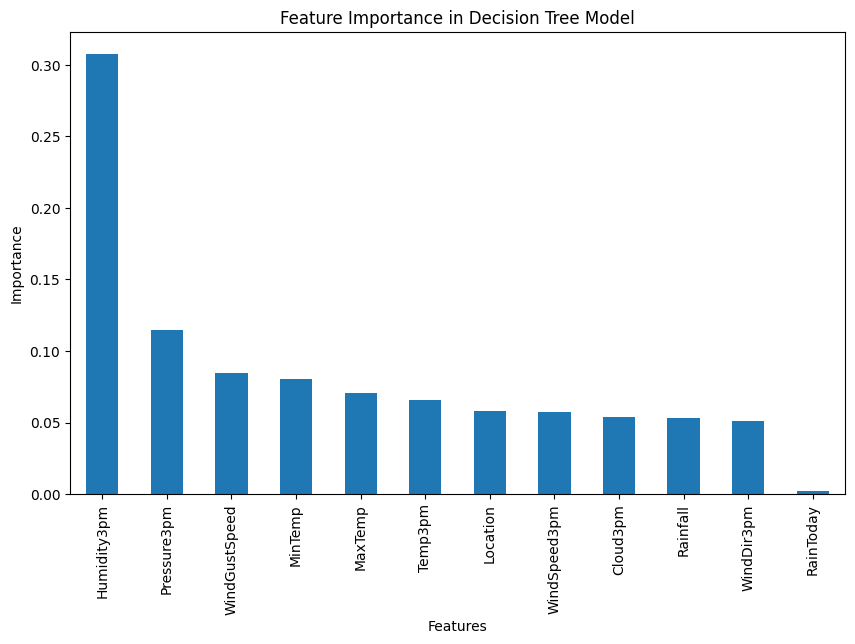

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'kakou_int_ptnB_train.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 決定木モデルを作成
model = DecisionTreeClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

# 特徴量考慮したptnB検証

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnB_train8.csv'
train_data = pd.read_csv(train_file, header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, [2, 3, 4, 6, 8, 9, 10, 12]] # 特徴量考慮
y_train = train_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_train) ===")
# print(X_train)
# print("------")
# print(X_train.dtypes)

# print("=== Initial Data Types (y_train) ===")
# print(y_train)
# print("------")
# print(y_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'tokutyou_int_ptnB_theme2_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('tokutyou_int_ptnB_theme2_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
test_file = 'int_ptnB_train2.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目以降の2-13カラム目を説明変数として取得（ヘッダを含まない）
# 説明変数と目的変数を分ける
X_val = test_data.iloc[1:, [2, 3, 4, 6, 8, 9, 10, 12]] # 特徴量考慮
y_val = test_data.iloc[1:, 14]    # 14カラム目が目的変数

# 各カラムのデータ型を出力
# print("=== Initial Data Types (X_val) ===")
# print(X_val)
# print("------")
# print(X_val.dtypes)

# print("=== Initial Data Types (y_val) ===")
# print(y_val)
# print("------")
# print(y_val.dtypes)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))


Saving int_ptnB_train2.csv to int_ptnB_train2 (2).csv
Saving int_ptnB_train8.csv to int_ptnB_train8 (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 78.00%

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.85      0.86      7073
         Yes       0.53      0.54      0.53      2137

    accuracy                           0.78      9210
   macro avg       0.69      0.70      0.69      9210
weighted avg       0.78      0.78      0.78      9210


Confusion Matrix:
[[6025 1048]
 [ 978 1159]]


# そもそもモデルを検討する

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルを定義
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# 各モデルの精度を計算
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: Average Accuracy = {results[name]:.4f}")

# 結果を表示
print("\nModel Comparison:")
for name in results:
    print(f"{name}: {results[name]:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train.csv
Evaluating Decision Tree...
Decision Tree: Average Accuracy = 0.7823
Evaluating Random Forest...
Random Forest: Average Accuracy = 0.8503
Evaluating Gradient Boosting...
Gradient Boosting: Average Accuracy = 0.8486
Evaluating Support Vector Machine...
Support Vector Machine: Average Accuracy = 0.8362
Evaluating Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression: Average Accuracy = 0.8421

Model Comparison:
Decision Tree: 0.7823
Random Forest: 0.8503
Gradient Boosting: 0.8486
Support Vector Machine: 0.8362
Logistic Regression: 0.8421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Logistic Regression深堀

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化のためのスケーラーを初期化
scaler = StandardScaler()

# 訓練データを標準化
X_train_scaled = scaler.fit_transform(X_train)

# テストデータを標準化（訓練データでフィットしたスケーラーを使用）
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを初期化
model = LogisticRegression(max_iter=1000, random_state=42)

# モデルを訓練
model.fit(X_train_scaled, y_train)

# テストデータでの予測
y_pred = model.predict(X_test_scaled)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train.csv
Accuracy: 0.8458


# ランダムフォレストでどこまで削れるか

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('ext_int_ptnB_train.csv')

# データを確認
print("------")
print(train_data.columns)

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。
print("--aaa----")
print(train_data.columns)

# Accuracy: 0.8474
# X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm','WindSpeed3pm']]
# Accuracy: 0.8466
# X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm']]
# Accuracy: 0.8167
X = train_data[['Location', 'MinTemp', 'MaxTemp','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

ModuleNotFoundError: No module named 'missingpy'

# ランダムフォレスト仕切り直し

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall',
                'WindGustSpeed', 'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm',
                'Pressure3pm', 'Cloud3pm', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train_scaled, y_train)

# モデルを保存する
model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_ptnB_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test_scaled)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train (8).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8514


# ランダムフォレストで説明変数削減モデル

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnB_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Location', 'MinTemp', 'MaxTemp','WindGustSpeed','Humidity3pm','Pressure3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを初期化
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '1202_int_ptnB_6param_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('1202_int_ptnB_6param_theme2_randomforest_model.joblib')

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving int_ptnB_train.csv to int_ptnB_train (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8466


# 線形補間

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# CSVファイルからデータを読み込み
uploaded = files.upload()
data = pd.read_csv('1202_extracted_ptnB_test.csv')

# データの確認（最初の数行を確認して、欠損値がどこにあるかを確認）
print("Before interpolation:")
print(data.head())

# 線形補間を適用
data_interpolated = data.interpolate(method='linear')

# 補間後のデータを確認
print("\nAfter interpolation:")
print(data_interpolated.head())

# 必要に応じて、補間されたデータを新しいCSVとして保存
data_interpolated.to_csv('1202_ext_test_interpolated.csv', index=False)

Saving 1202_extracted_ptnB_test.csv to 1202_extracted_ptnB_test.csv
Before interpolation:
           id        Date Location  MinTemp  MaxTemp  WindGustSpeed  \
0  test_00000   2008/12/4   Albury      9.2     28.0           24.0   
1  test_00001   2008/12/9   Albury      9.7     31.9           80.0   
2  test_00002  2008/12/14   Albury     12.6     21.0           44.0   
3  test_00003  2008/12/19   Albury     11.2     22.5           43.0   
4  test_00004  2008/12/24   Albury     15.3     30.9           33.0   

   Humidity3pm  Pressure3pm RainToday  
0         16.0       1012.8        No  
1          9.0       1003.6        No  
2         43.0       1001.8       Yes  
3         32.0       1009.7       Yes  
4         23.0       1008.2        No  

After interpolation:
           id        Date Location  MinTemp  MaxTemp  WindGustSpeed  \
0  test_00000   2008/12/4   Albury      9.2     28.0           24.0   
1  test_00001   2008/12/9   Albury      9.7     31.9           80.0   
2  test_

<ipython-input-4-5d9209a89b3f>:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_interpolated = data.interpolate(method='linear')


# 補完後データの文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('1202_ext_test_interpolated.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('1202_int_ext_test_interpolated.csv', index=False)
files.download('1202_int_ext_test_interpolated.csv')

Saving 1202_ext_test_interpolated.csv to 1202_ext_test_interpolated (1).csv


<ipython-input-5-6c5da574d982>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 補間後ランダムフォレスト実践

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1202_int_ptnB_6param_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = '1202_int_ext_test_interpolated.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
print("---test_data---")
print(test_data)

# 2行目から説明変数を取得（2-8カラム目を使用）
X_test = test_data.iloc[0:, 2:8]  # 2行目以降の4-6カラム目を使用

### デバッグ
print("---X_test---")
print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1202_ptnB_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1202_ptnB_theme2_randomforest_result.csv')

Saving 1202_int_ext_test_interpolated.csv to 1202_int_ext_test_interpolated (1).csv
---test_data---
               id        Date  Location  MinTemp  MaxTemp  WindGustSpeed  \
0      test_00000   2008/12/4         1      9.2     28.0           24.0   
1      test_00001   2008/12/9         1      9.7     31.9           80.0   
2      test_00002  2008/12/14         1     12.6     21.0           44.0   
3      test_00003  2008/12/19         1     11.2     22.5           43.0   
4      test_00004  2008/12/24         1     15.3     30.9           33.0   
...           ...         ...       ...      ...      ...            ...   
28188  test_28188   2017/5/31        36      5.4     20.5           46.0   
28189  test_28189    2017/6/5        36      4.9     20.7           37.0   
28190  test_28190   2017/6/10        36      3.2     18.6           46.0   
28191  test_28191   2017/6/15        36      2.6     22.5           19.0   
28192  test_28192   2017/6/20        36      3.5     21.8       

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# なんか回答部分も0,1変換されてるので戻す

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルの読み込み
df = pd.read_csv('1202_ptnB_theme2_randomforest_result.csv', header=None)

# 2列目の全ての値を変換する
df.iloc[0:, 1] = df.iloc[0:, 1].map({0: 'No', 1: 'Yes'})

# 変換後のデータフレームを表示
print(df)

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1202_conv_ptnB_theme2_randomforest_result.csv'
df.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1202_conv_ptnB_theme2_randomforest_result.csv')


                0    1
0      test_00000   No
1      test_00001   No
2      test_00002   No
3      test_00003   No
4      test_00004   No
...           ...  ...
28188  test_28188   No
28189  test_28189  Yes
28190  test_28190   No
28191  test_28191   No
28192  test_28192  Yes

[28193 rows x 2 columns]
Predictions saved to 1202_conv_ptnB_theme2_randomforest_result.csv


<ipython-input-36-3fefe87256a2>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['No' 'No' 'No' ... 'No' 'No' 'Yes']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[0:, 1] = df.iloc[0:, 1].map({0: 'No', 1: 'Yes'})


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# --- ptnC検討 ---

# ptnC文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ptnC_train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_ptnC_train.csv', index=False)
files.download('int_ptnC_train.csv')

Saving ptnC_train.csv to ptnC_train (2).csv


<ipython-input-4-1db6515167bf>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ptnC特徴量調査

特徴量の重要度:
Humidity3pm     0.239961
MinTemp         0.095796
Temp3pm         0.093699
Humidity9am     0.091818
Temp9am         0.090173
MaxTemp         0.089301
Rainfall        0.078124
WindSpeed3pm    0.071032
WindSpeed9am    0.062904
Location        0.057873
RainToday       0.029320
dtype: float64


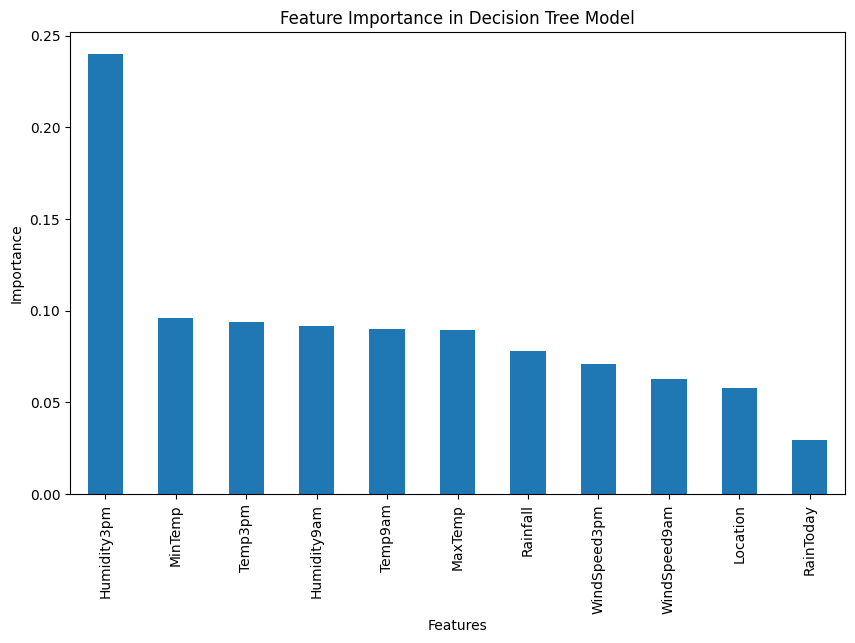

Accuracy: 0.8399


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnC_train.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ptnC特徴量減少

Saving int_ptnC_train.csv to int_ptnC_train (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

特徴量の重要度:
Humidity3pm    0.250240
MinTemp        0.120583
Temp3pm        0.120508
Temp9am        0.114560
Humidity9am    0.112247
MaxTemp        0.111893
Rainfall       0.101753
Location       0.068215
dtype: float64


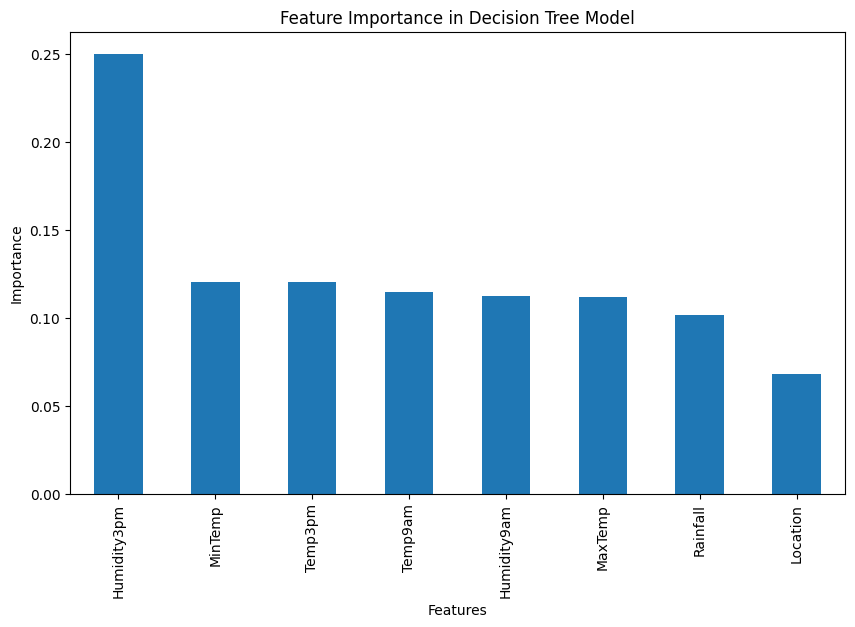

Accuracy: 0.8393


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_ptnC_train.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_ptnC_8param_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_ptnC_8param_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ptnC_testデータ文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ext_ptnC_test.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
# df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_ext_ptnC_test.csv', index=False)
files.download('int_ext_ptnC_test.csv')

Saving ext_ptnC_test.csv to ext_ptnC_test (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# testデータの補完(前方補完)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()

# CSVファイルを読み込む
file_path = 'ext_ptnC_test.csv'
data = pd.read_csv(file_path)

# 欠損データを前方補完する
data_filled = data.fillna(method='ffill')

# 結果を表示
print(data_filled)

# 必要であれば、補完したデータを新しいCSVファイルとして保存
data_filled.to_csv('ext_ptnC_test_filled.csv', index=False)
files.download('ext_ptnC_test_filled.csv')

Saving ext_ptnC_test.csv to ext_ptnC_test.csv
               id        Date Location  MinTemp  MaxTemp  Rainfall  \
0      test_00000   2008/12/4   Albury      9.2     28.0       0.0   
1      test_00001   2008/12/9   Albury      9.7     31.9       0.0   
2      test_00002  2008/12/14   Albury     12.6     21.0       3.6   
3      test_00003  2008/12/19   Albury     11.2     22.5      10.6   
4      test_00004  2008/12/24   Albury     15.3     30.9       0.0   
...           ...         ...      ...      ...      ...       ...   
28188  test_28188   2017/5/31    Uluru      5.4     20.5       0.0   
28189  test_28189    2017/6/5    Uluru      4.9     20.7       0.0   
28190  test_28190   2017/6/10    Uluru      3.2     18.6       0.0   
28191  test_28191   2017/6/15    Uluru      2.6     22.5       0.0   
28192  test_28192   2017/6/20    Uluru      3.5     21.8       0.0   

       Humidity9am  Humidity3pm  Temp9am  Temp3pm  
0             45.0         16.0     18.1     26.5  
1        

<ipython-input-7-2851ef09ab74>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# testデータの補完(後方補完)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()

# CSVファイルを読み込む
file_path = 'ext_ptnC_test.csv'
data = pd.read_csv(file_path)

# 欠損データを後方補完する
data_filled = data.fillna(method='bfill')

# 結果を表示
print(data_filled)

# 必要であれば、補完したデータを新しいCSVファイルとして保存
data_filled.to_csv('ext_ptnC_test_billed.csv', index=False)
files.download('ext_ptnC_test_billed.csv')

Saving ext_ptnC_test.csv to ext_ptnC_test (4).csv
               id        Date Location  MinTemp  MaxTemp  Rainfall  \
0      test_00000   2008/12/4   Albury      9.2     28.0       0.0   
1      test_00001   2008/12/9   Albury      9.7     31.9       0.0   
2      test_00002  2008/12/14   Albury     12.6     21.0       3.6   
3      test_00003  2008/12/19   Albury     11.2     22.5      10.6   
4      test_00004  2008/12/24   Albury     15.3     30.9       0.0   
...           ...         ...      ...      ...      ...       ...   
28188  test_28188   2017/5/31    Uluru      5.4     20.5       0.0   
28189  test_28189    2017/6/5    Uluru      4.9     20.7       0.0   
28190  test_28190   2017/6/10    Uluru      3.2     18.6       0.0   
28191  test_28191   2017/6/15    Uluru      2.6     22.5       0.0   
28192  test_28192   2017/6/20    Uluru      3.5     21.8       0.0   

       Humidity9am  Humidity3pm  Temp9am  Temp3pm  
0             45.0         16.0     18.1     26.5  
1    

<ipython-input-22-548539168df8>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 前方補完+後方補完/2のファイル

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# CSVファイルを読み込む
uploaded = files.upload()
filled_file_path = 'ext_ptnC_test_filled.csv'
billed_file_path = 'ext_ptnC_test_billed.csv'

data_filled = pd.read_csv(filled_file_path)
data_billed = pd.read_csv(billed_file_path)

filled_subset = data_filled.iloc[:, 3:9]
billed_subset = data_billed.iloc[:, 3:9]

# デバッグ用: 対象カラムの内容を表示
print("Filled Subset:")
print(filled_subset.head())  # filled_subsetの最初の数行

print("\nBilled Subset:")
print(billed_subset.head())  # billed_subsetの最初の数行


# 対応する列の平均を計算
average_subset = (filled_subset + billed_subset) / 2

# 元のデータのコピーを作成
data_average = data_filled.copy()

# 計算した平均を元のコピーの該当するカラムへ入れる
data_average.iloc[:, 3:9] = average_subset

# 平均値を格納したデータフレームを新しいCSVファイルに保存
average_file_path = 'ext_ptnC_test_ave.csv'
data_average.to_csv(average_file_path, index=False)
# 必要であれば、補完したデータを新しいCSVファイルとして保存
# data_filled.to_csv('int_ext_ptnC_test_filled_average.csv', index=False)
files.download('ext_ptnC_test_ave.csv')

# 結果を表示して確認
# print(f"Average data has been saved to {average_file_path}")
# print(data_average.head())

Saving ext_ptnC_test_billed.csv to ext_ptnC_test_billed (2).csv
Saving ext_ptnC_test_filled.csv to ext_ptnC_test_filled (2).csv
Filled Subset:
   MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Temp9am
0      9.2     28.0       0.0         45.0         16.0     18.1
1      9.7     31.9       0.0         42.0          9.0     18.3
2     12.6     21.0       3.6         65.0         43.0     15.8
3     11.2     22.5      10.6         47.0         32.0     15.5
4     15.3     30.9       0.0         55.0         23.0     20.9

Billed Subset:
   MinTemp  MaxTemp  Rainfall  Humidity9am  Humidity3pm  Temp9am
0      9.2     28.0       0.0         45.0         16.0     18.1
1      9.7     31.9       0.0         42.0          9.0     18.3
2     12.6     21.0       3.6         65.0         43.0     15.8
3     11.2     22.5      10.6         47.0         32.0     15.5
4     15.3     30.9       0.0         55.0         23.0     20.9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ptnC データ補完後のlocationの文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ext_ptnC_test_ave.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 7]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_ext_ptnC_test_ave.csv', index=False)
files.download('int_ext_ptnC_test_ave.csv')

Saving ext_ptnC_test_ave.csv to ext_ptnC_test_ave (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# データ補完(平均)でのランダムフォレスト8パラメータ

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'int_ptnC_8param_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'int_ext_ptnC_test_ave.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
print("---test_data---")
print(test_data)

# 2行目から説明変数を取得
X_test = test_data.iloc[0:, 2:10]

### デバッグ
print("---X_test---")
print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1202_ptnC_8Param_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1202_ptnC_8Param_theme2_randomforest_result.csv')

---test_data---
               id        Date  Location  MinTemp  MaxTemp  Rainfall  \
0      test_00000   2008/12/4         1      9.2     28.0       0.0   
1      test_00001   2008/12/9         1      9.7     31.9       0.0   
2      test_00002  2008/12/14         1     12.6     21.0       3.6   
3      test_00003  2008/12/19         1     11.2     22.5      10.6   
4      test_00004  2008/12/24         1     15.3     30.9       0.0   
...           ...         ...       ...      ...      ...       ...   
28188  test_28188   2017/5/31        36      5.4     20.5       0.0   
28189  test_28189    2017/6/5        36      4.9     20.7       0.0   
28190  test_28190   2017/6/10        36      3.2     18.6       0.0   
28191  test_28191   2017/6/15        36      2.6     22.5       0.0   
28192  test_28192   2017/6/20        36      3.5     21.8       0.0   

       Humidity9am  Humidity3pm  Temp9am  Temp3pm  
0             45.0           52     18.1     26.5  
1             42.0         

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# [NG]testデータの補完(前方補完+後方補完/2)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()

# CSVファイルを読み込む
file_path = 'int_ext_ptnC_test.csv'
data = pd.read_csv(file_path)

# 前方補完
forward_filled = data.fillna(method='ffill')

# 後方補完
backward_filled = data.fillna(method='bfill')

# forward_filled の内容をデバッグ表示
# print("\nForward Filled Data:")
# print(forward_filled.head())  # 前方補完後のデータの最初の数行を表示

# backward_filled の内容をデバッグ表示
# print("\nBackward Filled Data:")
# print(backward_filled.head())  # 前方補完後のデータの最初の数行を表示

# 前方補完と後方補完の平均で欠損値を埋める
# filled_average = (forward_filled + backward_filled) / 2

# 元のデータフレームの欠損値に平均値を埋める
# data_filled = data.combine_first(filled_average)

# 元のデータを更新
data.iloc[2:, 3] = data.iloc[2:, 3:7].combine_first((forward_filled + backward_filled) / 2)

# 結果を表示
print(data_filled)

# 必要であれば、補完したデータを新しいCSVファイルとして保存
data_filled.to_csv('int_ext_ptnC_test_filled_average.csv', index=False)
files.download('int_ext_ptnC_test_filled_average.csv')

<ipython-input-21-27ffcc3afbf1>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = data.fillna(method='ffill')
<ipython-input-21-27ffcc3afbf1>:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  backward_filled = data.fillna(method='bfill')


TypeError: unsupported operand type(s) for /: 'str' and 'int'

# もう一度モデル検証

# ニューラルネットワーク

In [ ]:
!pip install tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# データの読み込み
data = pd.read_csv('int_ptnC_train.csv')  # データファイルのパスを指定

# データの前処理
# 欠損値を平均値で補完する例
# data.fillna(data.mean(), inplace=True)

# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7965 - loss: 0.4720 - val_accuracy: 0.8355 - val_loss: 0.3996
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8284 - loss: 0.4200 - val_accuracy: 0.8361 - val_loss: 0.3986
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8339 - loss: 0.4122 - val_accuracy: 0.8366 - val_loss: 0.3963
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8346 - loss: 0.4106 - val_accuracy: 0.8362 - val_loss: 0.3971
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8333 - loss: 0.4069 - val_accuracy: 0.8354 - val_loss: 0.3957
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8343 - loss: 0.4037 - val_accuracy: 0.8371 - val_loss: 0.3990
Epoch 7/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8344 - loss: 0.4017 - val_accuracy: 0.8369 - val_loss: 0.3960
Epoch 8/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8344 - loss: 0.4029 - 

# 再帰ニューラルネットワーク（RNN）/LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

# データの読み込み
# 'weather_data.csv'の代わりに実際のデータファイルを使用してください
data = pd.read_csv('int_ptnC_train.csv')

# データの前処理
# 欠損値を平均値で補完する
# data.fillna(data.mean(), inplace=True)

# 特徴量とラベルに分ける
# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# RNNの入力に適した形に変形
# RNNでは入力データを3次元テンソルにする必要があります (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# RNNモデルの構築
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")

print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7960 - loss: 0.4688 - val_accuracy: 0.8260 - val_loss: 0.4072
Epoch 2/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8270 - loss: 0.4136 - val_accuracy: 0.8323 - val_loss: 0.4011
Epoch 3/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8308 - loss: 0.4083 - val_accuracy: 0.8318 - val_loss: 0.3989
Epoch 4/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8338 - loss: 0.4048 - val_accuracy: 0.8355 - val_loss: 0.3966
Epoch 5/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8349 - loss: 0.4004 - val_accuracy: 0.8330 - val_loss: 0.4018
Epoch 6/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8343 - loss: 0.4015 - val_accuracy: 0.8336 - val_loss: 0.3955
Epoch 7/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8370 - loss: 0.3976 - val_accuracy: 0.8356 - val_loss: 0.3951
Epoch 8/10
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8379 - loss: 0.3961 - val

# ニューラルネットワーク調整_1_失敗

In [ ]:
# !pip install tensorflow
# tensorflowはインストールされてる前提
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# データの読み込み
data = pd.read_csv('int_ptnC_train.csv')  # データファイルのパスを指定

# データの前処理
# 欠損値を平均値で補完する例
# data.fillna(data.mean(), inplace=True)

# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # ユニット数を増やした
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))  # 追加の隠れ層
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))  # 既存の層
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))  # 追加の層
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 出力層

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1524/1524 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7777 - loss: 0.5099 - val_accuracy: 0.8338 - val_loss: 0.4076
Epoch 2/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8149 - loss: 0.4400 - val_accuracy: 0.8363 - val_loss: 0.4025
Epoch 3/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8236 - loss: 0.4240 - val_accuracy: 0.8359 - val_loss: 0.4016
Epoch 4/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8188 - loss: 0.4295 - val_accuracy: 0.8341 - val_loss: 0.4044
Epoch 5/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8198 - loss: 0.4237 - val_accuracy: 0.8309 - val_loss: 0.4062
Epoch 6/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8231 - loss: 0.4244 - val_accuracy: 0.8360 - val_loss: 0.3974
Epoch 7/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8234 - loss: 0.4218 - val_accuracy: 0.8348 - val_loss: 0.3955
Epoch 8/15
1524/1524 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8279 - loss: 0.4172 - val_accurac

# ニューラルネットワーク調整_2

In [ ]:
# !pip install tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# データの読み込み
data = pd.read_csv('int_ptnC_train.csv')  # データファイルのパスを指定

# データの前処理
# 欠損値を平均値で補完する例
# data.fillna(data.mean(), inplace=True)

# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


762/762 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7688 - loss: 0.5007 - val_accuracy: 0.8332 - val_loss: 0.4032
Epoch 2/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8260 - loss: 0.4278 - val_accuracy: 0.8364 - val_loss: 0.3986
Epoch 3/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8306 - loss: 0.4174 - val_accuracy: 0.8351 - val_loss: 0.3961
Epoch 4/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8307 - loss: 0.4159 - val_accuracy: 0.8363 - val_loss: 0.3946
Epoch 5/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8350 - loss: 0.4062 - val_accuracy: 0.8373 - val_loss: 0.3976
Epoch 6/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8344 - loss: 0.4071 - val_accuracy: 0.8357 - val_loss: 0.3944
Epoch 7/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8318 - loss: 0.4096 - val_accuracy: 0.8368 - val_loss: 0.3950
Epoch 8/10
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8348 - loss: 0.4039 - val_accuracy: 0.8348 - val_

# ニューラルネットワーク再調整

In [ ]:
#!pip install tensorflow
# tensorflowはインストールされてる前提
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from google.colab import files

# データの読み込み
# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('int_ptnC_train.csv')  # データファイルのパスを指定

# データの前処理
# 欠損値を平均値で補完する例
# data.fillna(data.mean(), inplace=True)

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='elu'))  # ユニット数を増やした
model.add(Dropout(0.5))
model.add(Dense(64, activation='elu'))  # 追加の隠れ層
model.add(Dropout(0.5))
model.add(Dense(32, activation='elu'))  # 既存の層
model.add(Dropout(0.5))
model.add(Dense(16, activation='elu'))  # 追加の層
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # 出力層

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

Saving int_ptnC_train.csv to int_ptnC_train (2).csv
Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7491 - loss: 0.5320 - val_accuracy: 0.8280 - val_loss: 0.4049
Epoch 2/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8250 - loss: 0.4315 - val_accuracy: 0.8317 - val_loss: 0.4030
Epoch 3/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8270 - loss: 0.4239 - val_accuracy: 0.8292 - val_loss: 0.4025
Epoch 4/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8252 - loss: 0.4250 - val_accuracy: 0.8335 - val_loss: 0.4020
Epoch 5/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8243 - loss: 0.4235 - val_accuracy: 0.8326 - val_loss: 0.4022
Epoch 6/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8280 - loss: 0.4175 - val_accuracy: 0.8314 - val_loss: 0.4008
Epoch 7/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8277 - loss: 0.4218 - val_accuracy: 0.8285 - val_loss: 0.4018
Epoch 8/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8254 - loss: 0.4231 - val_accuracy: 0.8310 - val_

# 再調整

In [ ]:
# !pip install tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# データの読み込み
data = pd.read_csv('int_ptnC_train.csv')  # データファイルのパスを指定

# データの前処理
# 欠損値を平均値で補完する例
# data.fillna(data.mean(), inplace=True)

# 特徴量とラベルに分ける
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 標準化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# モデルの定義
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

# 評価
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("float64")
print(classification_report(y_test, y_pred_class))
print(f"Accuracy: {accuracy_score(y_test, y_pred_class)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7966 - loss: 0.4643 - val_accuracy: 0.8360 - val_loss: 0.3982
Epoch 2/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8333 - loss: 0.4107 - val_accuracy: 0.8347 - val_loss: 0.4006
Epoch 3/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8325 - loss: 0.4083 - val_accuracy: 0.8367 - val_loss: 0.3966
Epoch 4/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8337 - loss: 0.4075 - val_accuracy: 0.8359 - val_loss: 0.3936
Epoch 5/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8344 - loss: 0.4046 - val_accuracy: 0.8338 - val_loss: 0.3936
Epoch 6/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8332 - loss: 0.4048 - val_accuracy: 0.8358 - val_loss: 0.3930
Epoch 7/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8348 - loss: 0.4012 - val_accuracy: 0.8368 - val_loss: 0.3926
Epoch 8/15
762/762 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8373 - loss: 0.4023 - val_accuracy: 0.

# スタッキングモデル

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('int_ptnC_train.csv')

# データを確認
print("------")
print(train_data.columns)

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ベースモデルの定義
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# スタッキング分類器の定義
estimators = [
    ('decision_tree', dt_model),
    ('random_forest', rf_model)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)

# スタッキングモデルのトレーニングと評価
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

print(f'Stacking Model Accuracy: {stacking_accuracy:.2f}')

------
Index(['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
Stacking Model Accuracy: 0.84


# 特徴量の再調査

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('no_loss.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 変換カラム
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_no_loss.csv', index=False)
files.download('int_no_loss.csv')

<ipython-input-5-8e318bb44ba8>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ランダムフォレストで全特徴量調査

Saving int_no_loss.csv to int_no_loss.csv
特徴量の重要度:
Humidity3pm      0.159642
Sunshine         0.103499
Pressure3pm      0.062497
Pressure9am      0.058609
Cloud3pm         0.056280
WindGustSpeed    0.054998
Rainfall         0.052212
Humidity9am      0.046681
MinTemp          0.041084
Temp3pm          0.040028
Temp9am          0.038361
MaxTemp          0.037889
Evaporation      0.036274
WindSpeed3pm     0.030884
Location         0.030256
WindSpeed9am     0.028995
Cloud9am         0.027975
WindDir3pm       0.026790
WindGustDir      0.025885
WindDir9am       0.025500
RainToday        0.015662
dtype: float64


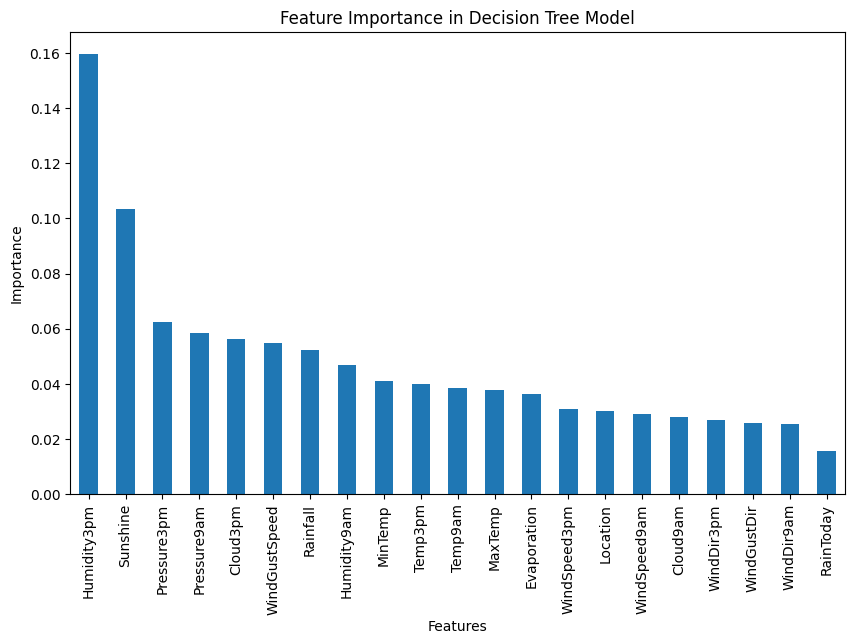

Accuracy: 0.8575


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ランダムフォレストで特徴量調整

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8586
# X = train_data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8580
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8565
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm']]
# Accuracy: 0.8367
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8401
# X = train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8435
X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# 10%欠損程度
# Accuracy: 0.8479
#X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

特徴量の重要度:
Humidity3pm      0.221599
WindGustSpeed    0.083977
Humidity9am      0.080861
MinTemp          0.067876
Temp3pm          0.067097
Rainfall         0.064109
MaxTemp          0.062719
Temp9am          0.062251
WindSpeed3pm     0.049100
WindSpeed9am     0.045256
Location         0.043751
WindDir3pm       0.041393
WindGustDir      0.040468
WindDir9am       0.040136
RainToday        0.029407
dtype: float64
Accuracy: 0.8479


# ランダムフォレスト深堀_コードミスのため使用不可

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8586
# X = train_data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8580
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8565
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm']]
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# ダミーデータの生成（実際のデータセットをここで読み込んでください）
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=33876, n_features=20, n_classes=2, random_state=42)

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルのインスタンスを作成
rf = RandomForestClassifier(random_state=42)

# 特徴量のスケーリングとモデルを含むパイプラインの作成
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # 特徴量のスケーリング
#     ('classifier', RandomForestClassifier(random_state=42))  # ランダムフォレストモデル
# ])

# ハイパーパラメータ候補
# param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [None, 10, 20],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4],
#     'classifier__max_features': ['auto', 'sqrt', 'log2'],
# }
# ハイパーパラメータの候補を定義
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],  # 'auto'を削除
}

# グリッドサーチを実行
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# 最適なモデルでの予測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

from sklearn.model_selection import RandomizedSearchCV

# ランダムサーチを実行
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=32, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 最適なモデルでの予測
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 精度とその他の評価指標を表示
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# print("Best Parameters:", grid_search.best_params_)
print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Accuracy: 0.9736
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3396
           1       0.98      0.97      0.97      3380

    accuracy                           0.97      6776
   macro avg       0.97      0.97      0.97      6776
weighted avg       0.97      0.97      0.97      6776



# ランダムフォレスト＋ランダムサーチ

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# ダミーデータの生成（実際のデータセットをここで読み込んでください）
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=33876, n_features=20, n_classes=2, random_state=42)

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルのインスタンスを作成
rf = RandomForestClassifier(random_state=42)

# 特徴量のスケーリングとモデルを含むパイプラインの作成
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # 特徴量のスケーリング
#     ('classifier', RandomForestClassifier(random_state=42))  # ランダムフォレストモデル
# ])

# ハイパーパラメータ候補
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [None, 10],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': ['sqrt', 'log2'],  # 'auto'を削除
#}

# ハイパーパラメータの候補を定義
# param_grid = {
#     'n_estimators': [200],
#    'max_depth': [None],
#    'min_samples_split': [5],
#    'min_samples_leaf': [2],
#    'max_features': ['sqrt'],
#}

# ハイパーパラメータの候補を定義
param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
}

# グリッドサーチを実行
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# 最適なモデルでの予測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

from sklearn.model_selection import RandomizedSearchCV

# ランダムサーチを実行
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=1, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 最適なモデルでの予測
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# モデルの保存 - 保存するファイル名に応じてパスを設定してください
model_filename = 'best_random_forest_model.pkl'
joblib.dump(best_model, model_filename)
# データの保存
files.download('best_random_forest_model.pkl')


# 精度とその他の評価指標を表示
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# print("Best Parameters:", grid_search.best_params_)
print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8392
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      5288
           1       0.73      0.42      0.53      1478

    accuracy                           0.84      6766
   macro avg       0.79      0.69      0.72      6766
weighted avg       0.83      0.84      0.82      6766



# ランダムフォレスト＋ランダムサーチ_r2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# ダミーデータの生成（実際のデータセットをここで読み込んでください）
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=33876, n_features=20, n_classes=2, random_state=42)

# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルのインスタンスを作成
rf = RandomForestClassifier(random_state=42)

# 特徴量のスケーリングとモデルを含むパイプラインの作成
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # 特徴量のスケーリング
#     ('classifier', RandomForestClassifier(random_state=42))  # ランダムフォレストモデル
# ])

# ハイパーパラメータ候補
#param_grid = {
#    'n_estimators': [100, 200],
#    'max_depth': [None, 10],
#    'min_samples_split': [2, 5],
#    'min_samples_leaf': [1, 2],
#    'max_features': ['sqrt', 'log2'],  # 'auto'を削除
#}

# ハイパーパラメータの候補を定義
# param_grid = {
#     'n_estimators': [200],
#    'max_depth': [None],
#    'min_samples_split': [5],
#    'min_samples_leaf': [2],
#    'max_features': ['sqrt'],
#}

# ハイパーパラメータの候補を定義
param_grid = {
    'n_estimators': [1000],
    'max_depth': [None],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
}

# グリッドサーチを実行
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# 最適なモデルでの予測
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

from sklearn.model_selection import RandomizedSearchCV

# ランダムサーチを実行
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=1, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# 最適なモデルでの予測
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# モデルの保存 - 保存するファイル名に応じてパスを設定してください
model_filename = 'best_random_forest_model.pkl'
joblib.dump(best_model, model_filename)
# データの保存
files.download('best_random_forest_model.pkl')


# 精度とその他の評価指標を表示
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
# print("Best Parameters:", grid_search.best_params_)
print("Best Parameters:", random_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ランダムフォレスト＋ランダムサーチモデル実行

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'best_random_forest_model.pkl'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'int_ext_ptnC_test_ave.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
print("---test_data---")
print(test_data)

# 2行目から説明変数を取得（2-8カラム目を使用）
X_test = test_data.iloc[0:, 2:8]  # 2行目以降の4-6カラム目を使用

### デバッグ
print("---X_test---")
print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'ptnC_best_random_forest_model_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('ptnC_best_random_forest_model_result.csv')

Saving int_ext_ptnC_test_ave.csv to int_ext_ptnC_test_ave.csv
---test_data---
               id        Date  Location  MinTemp  MaxTemp  Rainfall  \
0      test_00000   2008/12/4         1      9.2     28.0       0.0   
1      test_00001   2008/12/9         1      9.7     31.9       0.0   
2      test_00002  2008/12/14         1     12.6     21.0       3.6   
3      test_00003  2008/12/19         1     11.2     22.5      10.6   
4      test_00004  2008/12/24         1     15.3     30.9       0.0   
...           ...         ...       ...      ...      ...       ...   
28188  test_28188   2017/5/31        36      5.4     20.5       0.0   
28189  test_28189    2017/6/5        36      4.9     20.7       0.0   
28190  test_28190   2017/6/10        36      3.2     18.6       0.0   
28191  test_28191   2017/6/15        36      2.6     22.5       0.0   
28192  test_28192   2017/6/20        36      3.5     21.8       0.0   

       Humidity9am  Humidity3pm  Temp9am  Temp3pm  
0             45.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestClassifier is expecting 20 features as input.

# ロジスティック回帰深堀_2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('int_no_loss.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8336
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練データを標準化
# X_train_scaled = scaler.fit_transform(X_train)

# テストデータを標準化（訓練データでフィットしたスケーラーを使用）
# X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを初期化
model = LogisticRegression(max_iter=1000, random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8456


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# ロジスティック回帰_深堀_3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('int_no_loss.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8336
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練データを標準化
# X_train_scaled = scaler.fit_transform(X_train)

# テストデータを標準化（訓練データでフィットしたスケーラーを使用）
# X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを初期化
model = LogisticRegression(max_iter=5000, random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8478


# 文字列置換_2_方角処理

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
# uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('no_loss.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
# 16方位は西から東に流れると想定して数値にしている。
# 都市は一旦出てきた順
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 貿易風、偏西風、モンスーンは想定してないので
# 基本は西から東に流れる想定
# 本来北と南は弄った方が良いかもしれないが一旦0にしておく
direction_map = {
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}


# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('new_int_no_loss.csv', index=False)
files.download('new_int_no_loss.csv')

<ipython-input-5-64bc5f96c024>:147: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル再検討_2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('new_int_no_loss.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
X = data[['Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# モデルを定義
models = {
    # "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Decision Tree none": DecisionTreeClassifier(random_state=42),
    # "Decision Tree 3": DecisionTreeClassifier(max_depth=3,random_state=42),
    # "Decision Tree 5": DecisionTreeClassifier(max_depth=5,random_state=42),
    # "Decision Tree 10": DecisionTreeClassifier(max_depth=10,random_state=42),
    "Random Forest depth none": RandomForestClassifier(random_state=42),
    "Random Forest depth 3": RandomForestClassifier(max_depth=3,random_state=42),
    "Random Forest depth 5": RandomForestClassifier(max_depth=5,random_state=42),
    "Random Forest depth 10": RandomForestClassifier(max_depth=10,random_state=42),
    "Random Forest depth 15": RandomForestClassifier(max_depth=15,random_state=42),
    "Random Forest depth 20": RandomForestClassifier(max_depth=20,random_state=42),
    "Random Forest depth 25": RandomForestClassifier(max_depth=25,random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "Support Vector Machine": SVC(random_state=42),
}

# 各モデルの精度を計算
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: Average Accuracy = {results[name]:.4f}")

# 結果を表示
print("\nModel Comparison:")
for name in results:
    print(f"{name}: {results[name]:.4f}")

Evaluating Random Forest depth none...
Random Forest depth none: Average Accuracy = 0.8328
Evaluating Random Forest depth 3...
Random Forest depth 3: Average Accuracy = 0.8389
Evaluating Random Forest depth 5...
Random Forest depth 5: Average Accuracy = 0.8435
Evaluating Random Forest depth 10...
Random Forest depth 10: Average Accuracy = 0.8443
Evaluating Random Forest depth 15...
Random Forest depth 15: Average Accuracy = 0.8393
Evaluating Random Forest depth 20...
Random Forest depth 20: Average Accuracy = 0.8358
Evaluating Random Forest depth 25...
Random Forest depth 25: Average Accuracy = 0.8335

Model Comparison:
Random Forest depth none: 0.8328
Random Forest depth 3: 0.8389
Random Forest depth 5: 0.8435
Random Forest depth 10: 0.8443
Random Forest depth 15: 0.8393
Random Forest depth 20: 0.8358
Random Forest depth 25: 0.8335


# ランダムフォレストの特徴量再調査

Saving date_chg_int_new_int_no_loss.csv to date_chg_int_new_int_no_loss (2).csv
特徴量の重要度:
Humidity3pm    0.442089
Rainfall       0.150597
Humidity9am    0.094978
Temp3pm        0.072049
MinTemp        0.063496
Temp9am        0.050148
MaxTemp        0.048814
Date           0.045573
Location       0.032254
dtype: float64


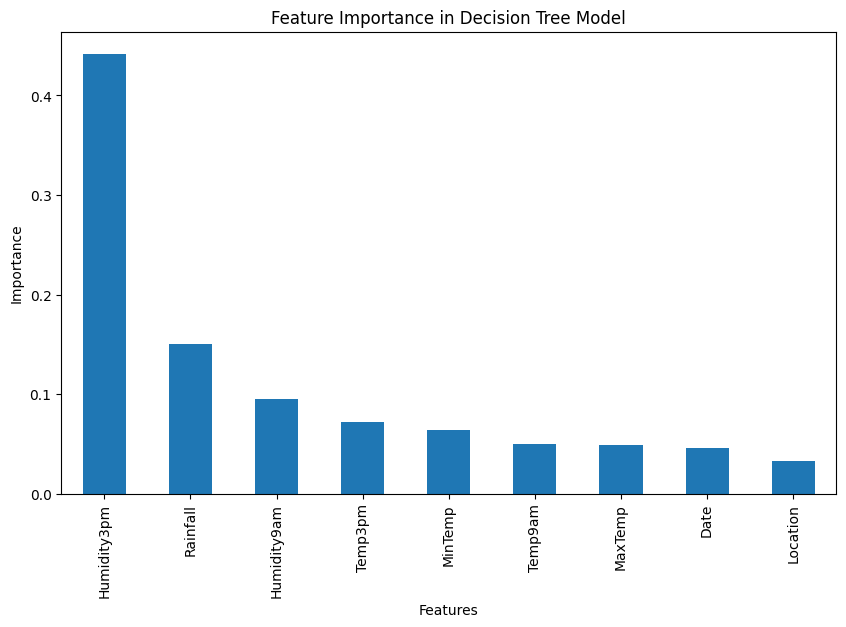

Accuracy: 0.8495


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'date_chg_int_new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# Accuracy: 0.8580
# X = train_data[['Date','Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8586
# X = train_data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8580
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8565
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm']]
# Accuracy: 0.8367
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8401
# X = train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8435
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# 10%欠損程度
# Accuracy: 0.8479
# new_int test_size0.1
# Accuracy: 0.8557
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# ptnC,test_size0.1
# Accuracy: 0.8457
# ptnC,test_size0.2
# Accuracy: 0.8490
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8383 test_size0.2
# Accuracy: 0.8490 test_size0.1
X = train_data[['Date','Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# ------- ここから場所とか日付とかで色々弄る(test_sizeは0.2)--------
# locaton 2のみのデータ
# Accuracy: 0.8308
# X = train_data[['Date','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# ---- 月縛り----
# 1月only
# Accuracy: 0.8726
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8774
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# ----年縛り-----
# 2013年
# Accuracy: 0.8355
#X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# 欠損500以下
# X = train_data[['Date','Location','MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(max_depth=10,random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# test_1月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '1gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '1gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('1gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 1gatu_int_no_loss.csv to 1gatu_int_no_loss (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8981


# 2月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '2gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '2gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('2gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 2gatu_int_no_loss.csv to 2gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8446


# 3月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '3gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '3gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('3gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 3gatu_int_no_loss.csv to 3gatu_int_no_loss (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8291


# 4月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '4gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '4gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('4gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 4gatu_int_no_loss.csv to 4gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8764


# 5月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '5gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '5gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('5gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

KeyboardInterrupt: 

# 6月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '6gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '6gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('6gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 6gatu_int_no_loss.csv to 6gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8175


# 7月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '7gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '7gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('7gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 7gatu_int_no_loss.csv to 7gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8255


# 8月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '8gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '8gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('8gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 8gatu_int_no_loss.csv to 8gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8221


# 9月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '9gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '9gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('9gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 9gatu_int_no_loss.csv to 9gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8597


# 10月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '10gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '10gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('10gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 10gatu_int_no_loss.csv to 10gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8339


# 11月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '11gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '11gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('11gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 11gatu_int_no_loss.csv to 11gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8239


# 12月ランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = '12gatu_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = '12gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('12gatu_size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving 12gatu_int_no_loss.csv to 12gatu_int_no_loss.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8774


# 念ため全体(size0.2)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'size0.2_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('size0.2_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving new_int_no_loss.csv to new_int_no_loss (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8367


# 念ため全体(size0.1)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'size0.1_int_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('size0.1_int_ptnC_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
# importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
# feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
# print("特徴量の重要度:")
# print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Saving new_int_no_loss.csv to new_int_no_loss (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8457


# [NG]月毎の評価調査

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)

# 日付列をdatetime型に変換（必要に応じて）
train_data['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 日付から月を抽出
train_data['Month'] = train_data['Date'].dt.month

# 月ごとにグループ化
grouped_data = train_data.groupby('Month')

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})


# 各月のデータを評価
for month, df in grouped_data:
    # 説明変数と目的変数を選択
    X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
    y = train_data['RainTomorrow']

    # データセットを分割 (ここではホールドアウト法で分割)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ランダムフォレストモデルの訓練
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 評価
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Month {month}: MSE = {mse:.2f}')
    # 精度の評価
    #y_pred_binary = (y_pred >= 0.5).astype(int)  # 例: 0.5をしきい値とした二値化
    # 正しくラベルを比較する
    #accuracy = accuracy_score(y_test, y_pred_binary)
    #print(f"Accuracy: {accuracy:.4f}")


Saving new_int_no_loss.csv to new_int_no_loss.csv
Month 12.0: MSE = 0.12


# クロスバリデーションランダムフォレスト

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']


# ランダムフォレストモデルの作成
model = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルを保存する
model_filename = 'cross_K-fold5_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('cross_K-fold5_ptnC_theme2_randomforest_model.joblib')

# Stratified K-Foldを構成
kf = StratifiedKFold(n_splits=5)

# クロスバリデーションを使用してモデルの評価
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# 結果の表示
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}')

Saving new_int_no_loss.csv to new_int_no_loss (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores: [0.27978126 0.83207687 0.70716925 0.83769401 0.83872875]
Mean Accuracy: 0.6991, Std: 0.2155


# testデータ加工_地域変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ext_12gatu_test.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
}



# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 2カラム目のみに変換を適用する
columns_to_convert = [2]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
# df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_12gatu_test.csv', index=False)
files.download('int_12gatu_test.csv')

Saving ext_12gatu_test.csv to ext_12gatu_test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# testデータ加工_欠損値補完(前方補完)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()

# CSVファイルを読み込む
file_path = 'int_12gatu_test.csv'
data = pd.read_csv(file_path)

# 欠損データを前方補完する
data_filled = data.fillna(method='ffill')

# 結果を表示
# print(data_filled)

# 必要であれば、補完したデータを新しいCSVファイルとして保存
data_filled.to_csv('int_12gatu_test_fill.csv', index=False)
files.download('int_12gatu_test_fill.csv')

<ipython-input-28-eb1fa057c304>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='ffill')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# testデータ加工_欠損値補完(後方補完)

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()

# CSVファイルを読み込む
file_path = 'int_12gatu_test.csv'
data = pd.read_csv(file_path)

# 欠損データを後方補完する
data_filled = data.fillna(method='bfill')

# 結果を表示
# print(data_filled)

# 必要であれば、補完したデータを新しいCSVファイルとして保存
data_filled.to_csv('int_12gatu_test_billed.csv', index=False)
files.download('int_12gatu_test_billed.csv')

<ipython-input-41-68a772b536d7>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = data.fillna(method='bfill')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 前方補完+後方補完/2のファイル

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# CSVファイルを読み込む
# uploaded = files.upload()
filled_file_path = 'int_12gatu_test_fill.csv'
billed_file_path = 'int_12gatu_test_billed.csv'

data_filled = pd.read_csv(filled_file_path)
data_billed = pd.read_csv(billed_file_path)

filled_subset = data_filled.iloc[:, 3:9]
billed_subset = data_billed.iloc[:, 3:9]

# デバッグ用: 対象カラムの内容を表示
# print("Filled Subset:")
# print(filled_subset.head())  # filled_subsetの最初の数行

# print("\nBilled Subset:")
# print(billed_subset.head())  # billed_subsetの最初の数行


# 対応する列の平均を計算
average_subset = (filled_subset + billed_subset) / 2

# 元のデータのコピーを作成
data_average = data_filled.copy()

# 計算した平均を元のコピーの該当するカラムへ入れる
data_average.iloc[:, 3:9] = average_subset

# 平均値を格納したデータフレームを新しいCSVファイルに保存
average_file_path = 'int_12gatu_test_ave.csv'
data_average.to_csv(average_file_path, index=False)
# 必要であれば、補完したデータを新しいCSVファイルとして保存
# data_filled.to_csv('int_ext_ptnC_test_filled_average.csv', index=False)
files.download('int_12gatu_test_ave.csv')

# 結果を表示して確認
# print(f"Average data has been saved to {average_file_path}")
# print(data_average.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 手動エクセル加工後の実際の評価(ランダムフォレスト)

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'size0.1_int_ptnC_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'sort_kakou_int_2_3_5_6_7_8_10_11_gatu_test_ave.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data.iloc[0:, 2:10]

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1206_nokori_ptnC_8Param_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1206_nokori_ptnC_8Param_theme2_randomforest_result.csv')

Saving size0.1_int_ptnC_theme2_randomforest_model.joblib to size0.1_int_ptnC_theme2_randomforest_model.joblib
Saving sort_kakou_int_2_3_5_6_7_8_10_11_gatu_test_ave.csv to sort_kakou_int_2_3_5_6_7_8_10_11_gatu_test_ave.csv
Predictions saved to 1206_nokori_ptnC_8Param_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# test_size_0.2 Test Accuracy: 0.8361
# epoh 25 test_size=0.1 Test Accuracy: 0.8407
# X = data[['Date', 'Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# epoh 25 test_size=0.1  Test Accuracy: 0.8643
# epoh 15 test_size=0.1  Test Accuracy: 0.8646
# epoh 15 test_size=0.1 Dense128/64 Test Accuracy: 0.8605
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# epoh 15 test_size=0.1 Dense64/32 Test Accuracy: 0.8620
# X = data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8578
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8560
# X = data[['Date', 'Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8537
# X = data[['Date', 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8555
# X = data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8599
# X = data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# epochs=15 Test Accuracy: 0.8581
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# epoh 15 test_size=0.1  Test Accuracy: Test Accuracy: 0.8646
# X = data[['Date', 'Location', 'MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8549
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
# X = data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
# epoh 25 test_size=0.1  Test Accuracy: 0.8643
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
# model = Sequential()
# Test Accuracy: 0.8537
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='softmax'))
# 128/64 Test Accuracy: 0.8528
# 64/32  Test Accuracy: 0.8519
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(64))
# model.add(LeakyReLU(alpha=0.0))  # alphaは負の部分の勾配の割合を表します
# model.add(Dense(32))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8288 - loss: 0.4192 - val_accuracy: 0.8479 - val_loss: 0.3737
Epoch 2/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8396 - loss: 0.3945 - val_accuracy: 0.8493 - val_loss: 0.3739
Epoch 3/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8396 - loss: 0.3903 - val_accuracy: 0.8430 - val_loss: 0.3831
Epoch 4/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8402 - loss: 0.3913 - val_accuracy: 0.8450 - val_loss: 0.3776
Epoch 5/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8395 - loss: 0.3864 - val_accuracy: 0.8420 - val_loss: 0.3792
Epoch 6/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8417 - loss: 0.3839 - val_accuracy: 0.8460 - val_loss: 0.3742
Epoch 7/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8384 - loss: 0.3902 - val_accuracy: 0.8466 - val_loss: 0.3759
Epoch 8/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8386 - loss: 0.3895 - val_accuracy: 0.8486 - val_

# 深層学習_r2

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
# 1024_relu/512_relu/softmax/20/256/0.1 Test Accuracy: 0.8602
# 512_relu/256_relu/softmax/20/128/0.1 Test Accuracy: 0.8634
# 512_relu/256_relu/softmax/15/128/0.1 Test Accuracy: 0.8593
# 512_relu/512_relu/softmax/15/512/0.1 Test Accuracy: 0.8620
model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# model.add(Dropout(0.3))TTest Accuracy: 0.8584
# model.add(Dropout(0.1))Test Accuracy: 0.8578
# drop無し: Test Accuracy: 0.8572

# 3層1024/512/256 Dropout 0.3
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8216 - loss: 0.3987 - val_accuracy: 0.8496 - val_loss: 0.3400
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8547 - loss: 0.3501 - val_accuracy: 0.8499 - val_loss: 0.3355
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8521 - loss: 0.3487 - val_accuracy: 0.8558 - val_loss: 0.3307
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8558 - loss: 0.3421 - val_accuracy: 0.8479 - val_loss: 0.3339
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8577 - loss: 0.3335 - val_accuracy: 0.8502 - val_loss: 0.3312
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8589 - loss: 0.3363 - val_accuracy: 0.8562 - val_loss: 0.3286
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8506 - loss: 0.3421 - val_accuracy: 0.8509 - val_loss: 0.3304
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8549 - loss: 0.3405 - val_accuracy: 0.8473 - v

# 深層学習_r3

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('512_256_128_softmax_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8245 - loss: 0.3932 - val_accuracy: 0.8519 - val_loss: 0.3273
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8544 - loss: 0.3379 - val_accuracy: 0.8512 - val_loss: 0.3254
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8552 - loss: 0.3326 - val_accuracy: 0.8499 - val_loss: 0.3206
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8571 - loss: 0.3325 - val_accuracy: 0.8512 - val_loss: 0.3225
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8607 - loss: 0.3267 - val_accuracy: 0.8542 - val_loss: 0.3205
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8591 - loss: 0.3295 - val_accuracy: 0.8512 - val_loss: 0.3280
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8596 - loss: 0.3262 - val_accuracy: 0.8516 - val_loss: 0.3204
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8648 - loss: 0.3143 - val_accuracy: 0.8585 - v

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3145
Test Accuracy: 0.8623


# 深層学習_r4 sigmoid

In [6]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Saving date_chg_int_new_int_no_loss.csv to date_chg_int_new_int_no_loss (1).csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8296 - loss: 0.3857 - val_accuracy: 0.8516 - val_loss: 0.3298
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8563 - loss: 0.3404 - val_accuracy: 0.8552 - val_loss: 0.3246
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8553 - loss: 0.3340 - val_accuracy: 0.8552 - val_loss: 0.3227
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8579 - loss: 0.3303 - val_accuracy: 0.8575 - val_loss: 0.3206
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8571 - loss: 0.3263 - val_accuracy: 0.8568 - val_loss: 0.3208
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8573 - loss: 0.3292 - val_accuracy: 0.8479 - val_loss: 0.3234
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8546 - loss: 0.3319 - val_accuracy: 0.8519 - val_loss: 0.3204
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8557 - loss: 0.3302 - val_accu

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8653 - loss: 0.3171
Test Accuracy: 0.8646


# 深層学習 LeakyReLU

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU を適用
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8203 - loss: 0.3993 - val_accuracy: 0.8509 - val_loss: 0.3371
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8549 - loss: 0.3421 - val_accuracy: 0.8483 - val_loss: 0.3397
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8569 - loss: 0.3432 - val_accuracy: 0.8542 - val_loss: 0.3302
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8530 - loss: 0.3419 - val_accuracy: 0.8542 - val_loss: 0.3302
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8565 - loss: 0.3386 - val_accuracy: 0.8535 - val_loss: 0.3320
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8543 - loss: 0.3411 - val_accuracy: 0.8519 - val_loss: 0.3335
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8557 - loss: 0.3392 - val_accuracy: 0.8535 - val_loss: 0.3325
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8582 - loss: 0.3374 - val_accura

# LeakyReLU 説明変数調整

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# X = data[['Date', 'Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU を適用
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8337 - loss: 0.3879 - val_accuracy: 0.8466 - val_loss: 0.3428
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8575 - loss: 0.3414 - val_accuracy: 0.8502 - val_loss: 0.3454
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8520 - loss: 0.3466 - val_accuracy: 0.8516 - val_loss: 0.3318
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8596 - loss: 0.3384 - val_accuracy: 0.8532 - val_loss: 0.3338
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8546 - loss: 0.3384 - val_accuracy: 0.8509 - val_loss: 0.3358
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8568 - loss: 0.3412 - val_accuracy: 0.8552 - val_loss: 0.3318
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8553 - loss: 0.3393 - val_accuracy: 0.8476 - val_loss: 0.3354
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8530 - loss: 0.3413 - val_accuracy: 0.8535 - va

# 小柳システム

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer  # 欠損値補完用だけどつかってない
import numpy as np
from google.colab import files

# データの読み込み
uploaded = files.upload()
# 学習用データ（不要な気象変数は除外済）
df_train = pd.read_csv('oyanagisystem_kakou_train.csv')

# 分析用データ（不要な気象変数は除外済）
df_test = pd.read_csv('oyanagisystem_kakou_test.csv')

#学習用データから変数の抽出
# ID, 日付は特徴量から除外（ここでは説明変数として気象情報のみを使う）
# X_train = df_train.drop(['id','Date','RainTomorrow'],axis=1)
# パクリデータはDateも使う
X_train = df_train.drop(['id','RainTomorrow'],axis=1)
y_train = df_train['RainTomorrow']  # 目的変数

#分析用データから変数の抽出
# ID, 日付は特徴量から除外（ここでは説明変数として気象情報のみを使う）
# X_test = df_test.drop(['id','Date'],axis=1)

# パクリデータはDateも使う
X_test = df_test.drop(['id'],axis=1)

# 観測地リストを作成
unique_stations = X_train['Location'].unique()

# 観測地ごとのモデル化
models = {}
for station in unique_stations:
    station_data = X_train[X_train['Location'] == station]
    station_target = y_train[X_train['Location'] == station]

    station_data2 = station_data.drop('Location',axis=1)

    # 決定木モデルで訓練実施
    model = DecisionTreeClassifier(max_depth=10)
    model.fit(station_data2, station_target)
    models[station] = model


# テストデータに対する分析～ファイル出力まで
predictions = {}
for station, model in models.items():
    station_test_data = X_test[X_test['Location'] == station]

    station_test_data2 = station_test_data.drop('Location',axis=1)

    predictions[station] = model.predict(station_test_data2)

    # 予測結果をpredictions_dfに格納する
    # 出力結果が列じゃなくて行で並んでしまったので（なんで？）Tつけて列に格納
    predictions_df = predictions[station].T

    # 回答用にIDと評価値classを組み合わせたcsvを作る
    df = pd.DataFrame(predictions_df)
    df.to_csv("oyanagi_system_DecisionTreeClassifier_depth10.csv",mode = 'a' , index = False ,header= False)

# for分の中に入ってて同じファイル大量にダウンロードするので注意
# files.download('oyanagi_system_DecisionTreeClassifier_depth10.csv')



Saving oyanagisystem_kakou_test.csv to oyanagisystem_kakou_test.csv
Saving oyanagisystem_kakou_train.csv to oyanagisystem_kakou_train.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 小柳システム改造

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer  # 欠損値補完用だけどつかってない
import numpy as np
from google.colab import files
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# データの読み込み
# uploaded = files.upload()
# 学習用データ（不要な気象変数は除外済）
df_train = pd.read_csv('oyanagisystem_kakou_train.csv')

# 分析用データ（不要な気象変数は除外済）
df_test = pd.read_csv('oyanagisystem_kakou_test.csv')

#学習用データから変数の抽出
# ID, 日付は特徴量から除外（ここでは説明変数として気象情報のみを使う）
# X_train = df_train.drop(['id','Date','RainTomorrow'],axis=1)
# パクリデータはDateも使う
X_train = df_train.drop(['id','RainTomorrow'],axis=1)
y_train = df_train['RainTomorrow']  # 目的変数

#分析用データから変数の抽出
# ID, 日付は特徴量から除外（ここでは説明変数として気象情報のみを使う）
# X_test = df_test.drop(['id','Date'],axis=1)

# パクリデータはDateも使う
X_test = df_test.drop(['id'],axis=1)

# 観測地リストを作成
unique_stations = X_train['Location'].unique()

# 観測地ごとのモデル化
models = {}
for station in unique_stations:
    station_data = X_train[X_train['Location'] == station]
    station_target = y_train[X_train['Location'] == station]

    station_data2 = station_data.drop('Location',axis=1)

    # 決定木モデルで訓練実施
    # model = DecisionTreeClassifier(max_depth=10)
    # ランダムフォレストで訓練
    RandomForestClassifier(max_depth=10,random_state=42)
    model.fit(station_data2, station_target)
    models[station] = model


# テストデータに対する分析～ファイル出力まで
predictions = {}
for station, model in models.items():
    station_test_data = X_test[X_test['Location'] == station]

    station_test_data2 = station_test_data.drop('Location',axis=1)

    predictions[station] = model.predict(station_test_data2)

    # 予測結果をpredictions_dfに格納する
    # 出力結果が列じゃなくて行で並んでしまったので（なんで？）Tつけて列に格納
    predictions_df = predictions[station].T

    # 回答用にIDと評価値classを組み合わせたcsvを作る
    df = pd.DataFrame(predictions_df)
    df.to_csv("oyanagi_system_RandomForestClassifier_depth10.csv",mode = 'a' , index = False ,header= False)

# for分の中に入ってて同じファイル大量にダウンロードするので注意
files.download('oyanagi_system_RandomForestClassifier_depth10.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# r3_trainデータ加工_文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
# 16方位は西から東に流れると想定して数値にしている。
# 都市は一旦出てきた順
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 貿易風、偏西風、モンスーンは想定してないので
# 基本は西から東に流れる想定
# 本来北と南は弄った方が良いかもしれないが一旦0にしておく
direction_map = {
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}


# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('all_int_train.csv', index=False)
files.download('all_int_train.csv')

Saving train.csv to train.csv


<ipython-input-5-a6a6c833cdd0>:161: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ヒートマップ

Saving kakou_all_int_train.csv to kakou_all_int_train.csv
---a----
    Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  39783         1     13.4     22.9       0.6          NaN       NaN   
1  39784         1      7.4     25.1       0.0          NaN       NaN   
2  39787         1     17.5     32.3       1.0          NaN       NaN   
3  39788         1     14.6     29.7       0.2          NaN       NaN   
4  39789         1     14.3     25.0       0.0          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0            1           44.0           1  ...         71.0         22.0   
1            2           44.0           4  ...         44.0         25.0   
2            1           41.0           7  ...         82.0         33.0   
3            2           56.0           1  ...         55.0         23.0   
4            1           50.0           3  ...         49.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am

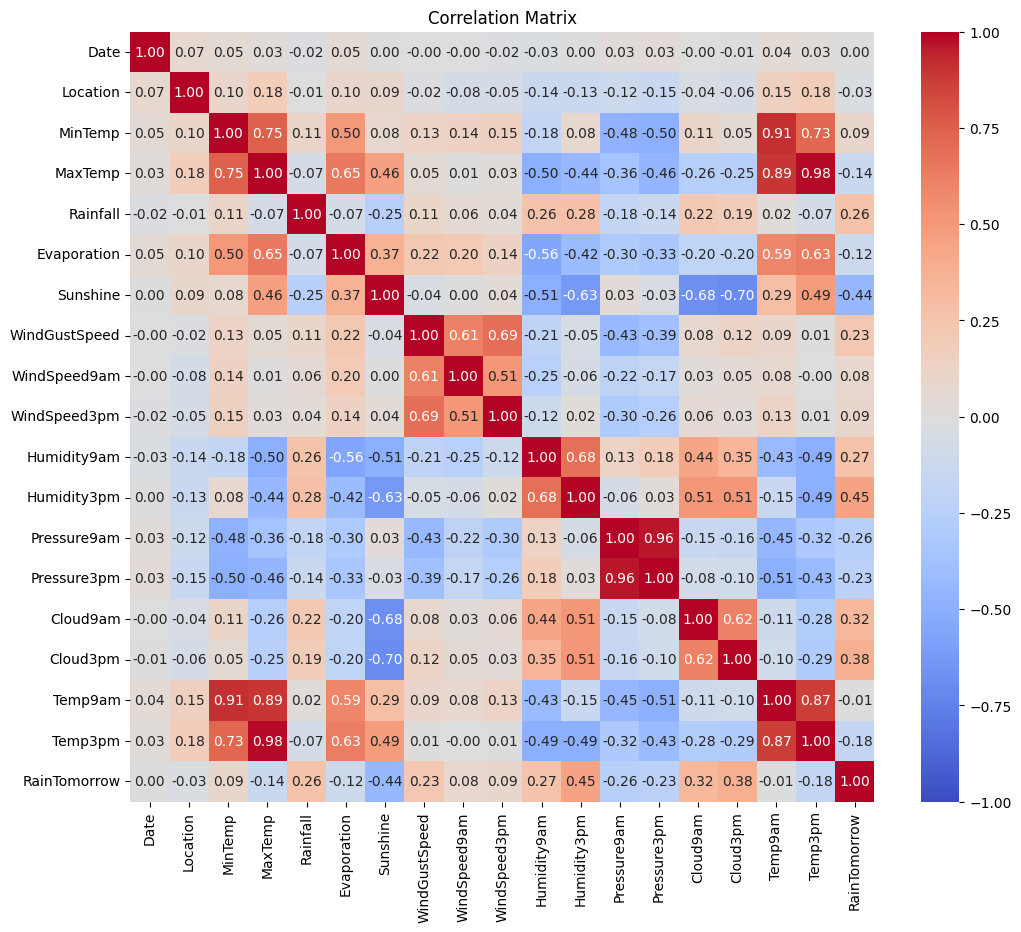

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# CSVファイルを読み込む
uploaded = files.upload()
data_base = pd.read_csv('kakou_all_int_train.csv')

# データの欠損値を確認（欠損値があると相関計算に影響するので、適切に処理する必要があります）
# 簡便のために、ここではdropnaを使って欠損値を含む行を削除しますが、他の方法（補間や別処置）もあります
print("---a----")
print(data_base.head())
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
data = data_base[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
print("-b---")
print(data.head())
data_cleaned = data.dropna()

print("--c--")
print(data_cleaned.head())
# 説明変数のみで相関を計算し、目的変数「RainTomorrow」との相関を見ます
correlation_matrix = data_cleaned.corr()

# 目的変数との相関を取得
correlation_with_target = correlation_matrix['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=False)

# 相関が強い順に表示
print("目的変数 'RainTomorrow' との相関が強い説明変数:")
print(correlation_with_target)

# 相関行列のヒートマップを描画する
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 深層学習モデル用のtestデータ加工(SimpleImputer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# データの読み込み
# uploaded = files.upload()
df = pd.read_csv('softmax_test.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('softmax_test_imputed.csv', index=False)

# ダウンロードする
files.download('softmax_test_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 全trainでもデータ加工しておく(検証用)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from google.colab import files

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('softmax_train.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('softmax_train_imputed.csv', index=False)

# ダウンロードする
files.download('softmax_train_imputed.csv')

Saving softmax_train.csv to softmax_train.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# SimpleImputer後のtrainデータで深層学習どうなる

In [3]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
# data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('softmax_train_imputed.csv')
data = pd.read_csv('float_train_imputed.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('softmax_train_imputed_512_256_128_softmax_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8291 - loss: 0.3969 - val_accuracy: 0.8526 - val_loss: 0.3523
Epoch 2/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8477 - loss: 0.3560 - val_accuracy: 0.8528 - val_loss: 0.3473
Epoch 3/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8477 - loss: 0.3561 - val_accuracy: 0.8525 - val_loss: 0.3438
Epoch 4/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8491 - loss: 0.3518 - val_accuracy: 0.8529 - val_loss: 0.3425
Epoch 5/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8518 - loss: 0.3471 - val_accuracy: 0.8566 - val_loss: 0.3414
Epoch 6/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8490 - loss: 0.3492 - val_accuracy: 0.8557 - val_loss: 0.3412
Epoch 7/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8513 - loss: 0.3490 - val_accuracy: 0.8570 - val_loss: 0.3430
Epoch 8/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8489 - loss: 0.3493 - va

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3372
Test Accuracy: 0.8537


# 機械学習でtestデータ評価

In [9]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



# CSVファイルからデータを読み込む
uploaded = files.upload()

# softmaxでやるつもりだったのでこのファイル名だが
# 別にtestデータにsoftmaxは使ってないのでsigmoidのモデルでもこのファイルが使える
# ★ID列も消してるので本来もうちょっとcsvどうにか手を加えたい
data = pd.read_csv('softmax_test_del_id.csv')

# 必要に応じてデータの前処理を行う
# ここでは標準化（Standard Scaling）を例にしています
scaler = StandardScaler()
X_test = scaler.fit_transform(data.values)  # assuming data is not labeled

# モデルのロード
model = load_model('512_256_128_sigmoid_ep25_ba128.h5')

# モデルを使用して予測
predictions = model.predict(X_test)

# 予測結果を表示
# Softmaxの出力なので、各行で最大値のインデックスが予測クラス
predicted_classes = predictions.argmax(axis=1)

# 予測結果をデータフレームに変換
results_df = pd.DataFrame({
    'Predicted_Class': predicted_classes,
    'Prediction_Probabilities': [list(pred) for pred in predictions]  # 各サンプルのすべての確率を格納
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1211_sigmoid_theme2_result.csv'
results_df.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1211_sigmoid_theme2_result.csv')

Saving softmax_test_del_id.csv to softmax_test_del_id.csv
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predictions saved to 1211_sigmoid_theme2_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 多数決

In [15]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
# uploaded = files.upload()
file1 = 'tennki_pred2.csv'
file2 = 'kakoku_1211_sigmoid_theme2_result.csv'
file3 = 'theme2_tree_model_result.csv'

# 各ファイルのデータをDataFrameに読み込む。列名を指定（0番目の列がサンプルID、1番目の列が予測）
df1 = pd.read_csv(file1, header=None, names=['SampleID', 'Prediction'])
df2 = pd.read_csv(file2, header=None, names=['SampleID', 'Prediction'])
df3 = pd.read_csv(file3, header=None, names=['SampleID', 'Prediction'])

# 結果を保存するためのリスト
ensemble_results = []

# 各行について多数決を行う
for i in range(len(df1)):
    # 各モデルの予測を取得
    prediction1 = df1.at[i, 'Prediction']
    prediction2 = df2.at[i, 'Prediction']
    prediction3 = df3.at[i, 'Prediction']

    # カウンターで最頻値（多数決）を取得
    votes = [prediction1, prediction2, prediction3]
    most_common_prediction = Counter(votes).most_common(1)[0][0]

    # 結果をリストに追加（サンプルIDと予測結果のペア）
    sample_id = df1.at[i, 'SampleID']
    ensemble_results.append((sample_id, most_common_prediction))

# データフレームに変換
ensemble_df = pd.DataFrame(ensemble_results, columns=['SampleID', 'Prediction'])

# 結果をCSVに保存
ensemble_df.to_csv('ensemble_predictions.csv', index=False)

# ヒートマップ2

Saving float_train_imputed.csv to float_train_imputed.csv
目的変数 'RainTomorrow' との相関が強い説明変数:
Humidity3pm      0.436116
Cloud3pm         0.300294
Humidity9am      0.253835
Cloud9am         0.250610
Rainfall         0.241051
WindGustSpeed    0.224603
WindSpeed9am     0.088515
WindSpeed3pm     0.086701
MinTemp          0.083577
Temp9am         -0.023343
Evaporation     -0.088247
MaxTemp         -0.153048
Temp3pm         -0.185504
Pressure3pm     -0.216866
Pressure9am     -0.236338
Sunshine        -0.323395
Name: RainTomorrow, dtype: float64


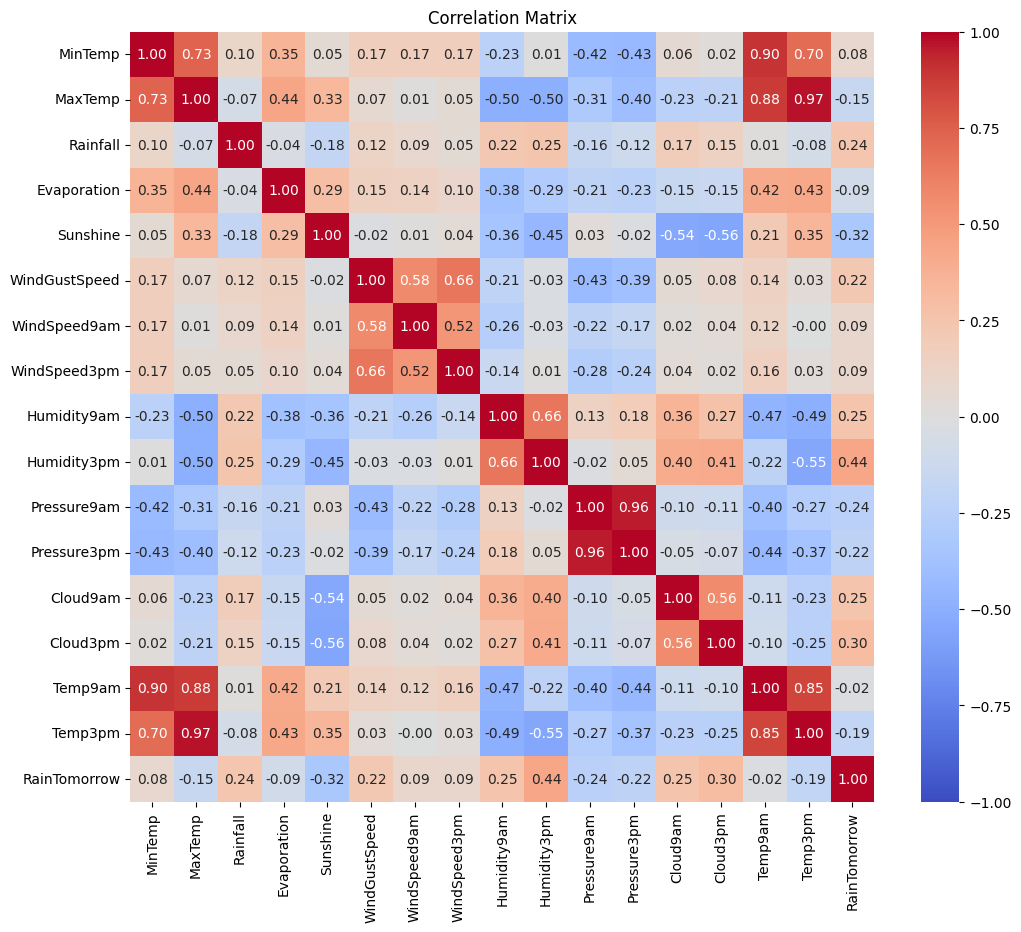

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# CSVファイルを読み込む
uploaded = files.upload()
data_base = pd.read_csv('float_train_imputed.csv')

# データの欠損値を確認（欠損値があると相関計算に影響するので、適切に処理する必要があります）
# 簡便のために、ここではdropnaを使って欠損値を含む行を削除しますが、他の方法（補間や別処置）もあります
# print("---a----")
# print(data_base.head())
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# data = data_base[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
#                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
data = data_base[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
# print("-b---")
# print(data.head())
data_cleaned = data.dropna()

# print("--c--")
# print(data_cleaned.head())
# 説明変数のみで相関を計算し、目的変数「RainTomorrow」との相関を見ます
correlation_matrix = data_cleaned.corr()

# 目的変数との相関を取得
correlation_with_target = correlation_matrix['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=False)

# 相関が強い順に表示
print("目的変数 'RainTomorrow' との相関が強い説明変数:")
print(correlation_with_target)

# 相関行列のヒートマップを描画する
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 深層学習_r5 sigmoid

In [19]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('float_train_imputed.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Cloud3pm','Humidity9am','Cloud9am','Rainfall','WindGustSpeed']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8216 - loss: 0.4024 - val_accuracy: 0.8534 - val_loss: 0.3514
Epoch 2/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8419 - loss: 0.3661 - val_accuracy: 0.8504 - val_loss: 0.3488
Epoch 3/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8420 - loss: 0.3612 - val_accuracy: 0.8532 - val_loss: 0.3466
Epoch 4/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8457 - loss: 0.3595 - val_accuracy: 0.8558 - val_loss: 0.3438
Epoch 5/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8395 - loss: 0.3654 - val_accuracy: 0.8549 - val_loss: 0.3444
Epoch 6/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8451 - loss: 0.3578 - val_accuracy: 0.8530 - val_loss: 0.3454
Epoch 7/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8440 - loss: 0.3599 - val_accuracy: 0.8571 - val_loss: 0.3430
Epoch 8/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8456 - loss: 0.3551 - val_accuracy: 0.

# ----テーマ1からパクり-----

# 文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# TSVファイルをロード
df = pd.read_csv('train.tsv', sep='\t', dtype=str)

# 変換ルールを定義
conversion_map = {
    'vhigh': 1,
    'high': 2,
    'med': 3,
    'low': 4,
    'small':5,
    'big':6,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら5を返す
        return conversion_map.get(value, 7)

# 3カラム目以降の全てを変換する
for column in df.columns[2:]:
    df[column] = df[column].apply(convert_value)

# 変換後のデータフレームを表示
print(df)

# 必要に応じて、新しいTSVファイルに保存
df.to_csv('int_train.tsv', sep='\t', index=False)
files.download('int_train.tsv')

# 決定木モデル作成

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_train8.tsv'
train_data = pd.read_csv(train_file, sep='\t', header=0)

# 説明変数と目的変数を分ける
X_train = train_data.iloc[1:, 2:8]  # 3,4,5,6,7,8カラム目が説明変数
y_train = train_data.iloc[1:, 1]    # 2カラム目が目的変数

# 各カラムのデータ型を出力
print("=== Initial Data Types (train8) ===")
print(X_train)
print("------")
print(X_train.dtypes)

# モデルを作成し訓練する
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# モデルを保存する
model_filename = 'int_decision_tree_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('int_decision_tree_model.joblib')

### 以下デバッグ用
# 評価用データを読み込む
#test_file = 'int_train2.tsv'
#test_data = pd.read_csv(test_file, sep='\t', header=0)

# 2行目以降の3,4,5,6,7,8カラム目を説明変数として取得（ヘッダを含まない）
#test_data = test_data.iloc[:, 2:8]  # 2行目以降を取得

# 各カラムのデータ型を出力
#print("=== Initial Data Types (train2) ===")
#print(test_data)
#print("------")
#print(test_data.dtypes)

# データが数値型であるか確認し、必要に応じて変換する
#test = test.apply(pd.to_numeric, errors='coerce')

# 新しいデータで目的変数を予測する
#predictions = model.predict(test_data)

# 予測結果を出力する
#output = pd.DataFrame(predictions, columns=['Predicted'])
#output.to_csv('predictions.csv', index=False)
# データの保存
#files.download('predictions.csv')


Saving int_train2.tsv to int_train2 (4).tsv
Saving int_train8.tsv to int_train8 (4).tsv
=== Initial Data Types (train8) ===
     buying  maint  doors  persons  lug_boot  safety
1         3      2      3        4         3       2
2         2      2      7        7         5       4
3         2      3      3        2         6       4
4         2      4      7        4         5       4
5         4      2      2        2         3       3
..      ...    ...    ...      ...       ...     ...
686       2      2      2        4         5       2
687       2      4      2        7         3       3
688       2      2      7        4         5       3
689       2      2      3        4         5       2
690       1      1      3        4         5       2

[690 rows x 6 columns]
------
buying      int64
maint       int64
doors       int64
persons     int64
lug_boot    int64
safety      int64
dtype: object


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル評価

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# ローカルファイルをアップロード
uploaded = files.upload()

# ファイルの読み込み
train_file = 'int_train8.tsv'
val_file = 'int_train2.tsv'

# データの読み込み
train_data = pd.read_csv(train_file, sep='\t', header=None)
val_data = pd.read_csv(val_file, sep='\t', header=None)

# 1行目が不要なら削除（場合によって削除が必要）
train_data = train_data.drop(index=0).reset_index(drop=True)
val_data = val_data.drop(index=0).reset_index(drop=True)

# 説明変数と目的変数の分割
X_train = train_data.drop(columns=1)
y_train = train_data[1]

X_val = val_data.drop(columns=1)
y_val = val_data[1]

# Categorical feature encoding
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)

# 対応する列を合わせる（片方にしかない列をカバー）
X_train, X_val = X_train.align(X_val, join='left', axis=1, fill_value=0)

# 決定木モデルのインスタンス作成と訓練
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# 検証データでの予測と評価
predictions = clf.predict(X_val)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 必要に応じて、分類レポートや混同行列の出力も可能
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_val, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, predictions))

Saving int_train2.tsv to int_train2 (8).tsv
Saving int_train8.tsv to int_train8 (8).tsv
Accuracy: 94.80%

Classification Report:
              precision    recall  f1-score   support

         acc       0.89      0.93      0.91        43
        good       0.75      0.43      0.55         7
       unacc       0.98      0.99      0.99       119
       vgood       0.75      0.75      0.75         4

    accuracy                           0.95       173
   macro avg       0.84      0.78      0.80       173
weighted avg       0.95      0.95      0.94       173


Confusion Matrix:
[[ 40   1   2   0]
 [  3   3   0   1]
 [  1   0 118   0]
 [  1   0   0   3]]


# 実践

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'int_decision_tree_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'int_test.tsv'
test_data = pd.read_csv(test_file, sep='\t', header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得（2,3,4,5,6,7カラム目を使用）
X_test = test_data.iloc[0:, 1:7]  # 2行目以降の2-7カラム目を使用

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'int_tree_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('int_tree_result.csv')

Saving int_decision_tree_model.joblib to int_decision_tree_model (12).joblib
Saving int_test.tsv to int_test (10).tsv
Predictions saved to int_tree_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>